# Project 5: Support Vector Classifaction
## Author: Ian R. Stewart
## Due: December 8, 2018

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import random; import sys

## Data preprocessing and Exploration

In [127]:
features = ['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10','Attr11','Attr12','Attr13','Attr14','Attr15','Attr16','Attr17','Attr18','Attr19','Attr20','Attr21','Attr22','Attr23','Attr24','Attr25','Attr26','Attr27','Attr28','Attr29','Attr30','Attr31','Attr32','Attr33','Attr34','Class']
df = pd.read_csv('./ionosphere.data',names=features)
df_classes = df.iloc[:,-1]
# Using StandardScaler to standardize the data.
scaler = StandardScaler()
scaler.fit(df.iloc[:,0:-1])
df_normed = scaler.transform(df.iloc[:,0:-1])

/Users/i6o/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [132]:
df_normed[0]

array([ 0.34843328,  0.        ,  0.71237237, -0.23425724,  0.48420769,
       -0.20173498,  0.57705879, -0.95467914,  0.96407416, -0.29751023,
        0.66865465, -0.67310732,  0.3166732 , -1.09854253,  0.40067797,
       -0.99048557,  0.74798503, -0.76968095,  0.35615548, -0.57471451,
        0.38264404, -0.58952424,  0.01158471, -0.79012864,  0.29772766,
       -0.86756495, -0.25386754, -0.71397123, -0.28828966, -0.61703878,
        0.12293694, -1.05505394, -0.3122206 , -0.99959483])

In [133]:
# Looking at first five values in classification column
df_classes[0:5]

0    g
1    b
2    g
3    b
4    g
Name: Class, dtype: object

In [129]:
print '- SHAPE OF ARRAY:'
print '\t'+ str(df.shape)
print '- UNIQUE CLASSIFICATION VALUES:'
print '\t'+ str(df['Class'].unique())

- SHAPE OF ARRAY:
	(351, 35)
- UNIQUE CLASSIFICATION VALUES:
	['g' 'b']


Binary classifcation problem as only the class feature only contains two values: 'g' for GOOD and 'b' for BAD.

In [130]:
df.dtypes

Attr1       int64
Attr2       int64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr32    float64
Attr33    float64
Attr34    float64
Class      object
dtype: object

Investigating number of unique values in each attribute

Attr1	:   2
Attr2	:   1
Attr3	:   219
Attr4	:   269
Attr5	:   204
Attr6	:   259
Attr7	:   231
Attr8	:   260
Attr9	:   244
Attr10	:   267
Attr11	:   246
Attr12	:   269
Attr13	:   238
Attr14	:   266
Attr15	:   234
Attr16	:   270
Attr17	:   254
Attr18	:   280
Attr19	:   254
Attr20	:   266
Attr21	:   248
Attr22	:   265
Attr23	:   248
Attr24	:   264
Attr25	:   256
Attr26	:   273
Attr27	:   256
Attr28	:   281
Attr29	:   244
Attr30	:   266
Attr31	:   243
Attr32	:   263
Attr33	:   245
Attr34	:   263
Class	:   2


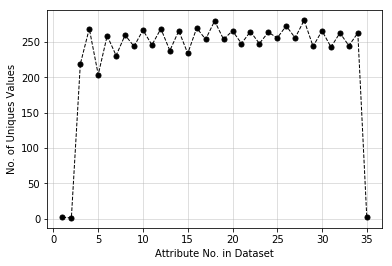

In [131]:
uniques = []
for i in range(df.shape[1]):
    uniques.append(len(df[features[i]].unique()))
    print '%s\t:   %i'%(features[i],uniques[i])
plt.plot(range(1,36),uniques,'ko--',linewidth=1,markersize=5)
plt.grid(alpha=0.5);plt.ylabel('No. of Uniques Values');plt.xlabel('Attribute No. in Dataset')
if False:
    plt.savefig('./Figures/Unique_values_data.png',dpi=400)

## SVM Analysis

> These sections are organized into the fives tasks on the three unique datasets provided for this Project. The tasks follow the ordering provided in the 

In [112]:
import random
def test_split(data_x,data_y,n):
    '''
    Description: Splits <data> variable into four random 
        parts based on <n> percentage of data for training 
        set.
    
    :param data_x {array} : x data to split,train,predict
    :param data_y {array} : y data to split,train,predict
    :param n      {float} : percentage of data to split
    
    :returns {6}: (x_train,x_test,y_train,y_test) ;     
        x_train = training set for <x> parameter
        x_test  = test set for <x> parameter
        y_train = training set for <y> paramter
        y_test  = test set for <y> parameter
        i_train = indexes of training set split
        i_test  = indexes of test set split
    
    e.g. x_tr,x,y_tr,y,i_tr,i_test=test_split(data_features,data_classes,40)
    '''
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))
def confusion_matrix_ian(y_predicted,y_true,prints=True):
    TN=0;FN=0;TP=0;FP=0
    for i in range(len(y_predicted)):
        y_pred0 = y_predicted[i]
        y_true0 = y_true[i]
        if y_pred0 == y_true0:
            if y_pred0=='g':
                TP+=1
            else:
                TN+=1
        else:
            if y_pred0 == 'b':
                FN+=1
            if y_pred0 == 'g':
                FP+=1
    if prints:
        print '======== CONFUSION MATRIX ========'
        print '\t\tPREDICTED CLASS\n\t\t---------------\nTRUE CLASS  |  Bad\tGood\n  Bad\t    |\t%i\t%i\n  Good \t    |\t%i\t%i'%(TN,FP,FN,TP)
        print '=================================='
    return TN,FN,TP,FP
            

In [90]:
(x_train,x_test,y_train,y_test,train_list,test_list) = test_split(df.iloc[:,0:-2],np.array(df.iloc[:,-1]),40)

In [135]:
model = svm.SVC()
model.fit(x_train,y_train)
model.score(x_train,y_train)

/Users/i6o/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9285714285714286

In [137]:
confusion_matrix_ian(predicted,y_test)
print '\n'
print classification_report(y_test,predicted)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Bad	Good
  Bad	    |	33	47
  Good 	    |	27	104


              precision    recall  f1-score   support

           b       0.55      0.41      0.47        80
           g       0.69      0.79      0.74       131

   micro avg       0.65      0.65      0.65       211
   macro avg       0.62      0.60      0.60       211
weighted avg       0.64      0.65      0.64       211



In [152]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','sigmoid','poly'), 'C':[0.1,1, 5,10]}
svc = svm.SVC(gamma='scale')
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train,y_train)

/Users/i6o/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'sigmoid', 'poly'), 'C': [0.1, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

140